# Key phrase extraction functions

In [1]:
import spacy
import textacy
import numpy as np

import matplotlib.pyplot as plt

/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


born
is taking


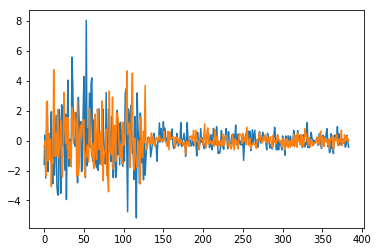

In [2]:
# https://stackoverflow.com/questions/47856247/extract-verb-phrases-using-spacy
# sentence = 'Donald Trump made up a story.'  # doesn't work for this, but I think we can edit the pattern
sentence = 'Kenyan-born Obama is taking our guns away.'
pattern = r'<VERB>?<ADV>*<VERB>+'
doc = textacy.Doc(sentence, lang='en_core_web_sm')
lists = textacy.extract.pos_regex_matches(doc, pattern)
for list_ in lists:
    print(list_.text)
#     print(list_.vector) # average of word vectors 
    plt.plot(list_.vector)

In [3]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp('Kenya-born Barack Hussien Obama is happily taking all of our guns away.')
for chunk in doc.noun_chunks:
    print(chunk.text, " - ", chunk.root.text, chunk.root.dep_, chunk.root.head.text)

Kenya-born Barack Hussien Obama  -  Obama nsubj taking
our guns  -  guns pobj of


In [4]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')

for ent in doc.ents:
    print(ent.text, " - ", ent.start_char, ent.end_char, ent.label_)

Apple  -  0 5 ORG
U.K.  -  27 31 GPE
$1 billion  -  44 54 MONEY


# Function call heirarchy


These functions call the next indented function.

### During pre-processing
```
process_claim_list

    process_sentence
        
        calculate_*_phrases_and_vectors
```


### During inference

```
process_article

    process_sentence
        
        calculate_*_phrases_and_vectors


article_against_claims

    article_sentence_against_claim
    
        compare_vector_array 
        
            meshgrid
            cosine
            calculate_similarity_score
```

### Comparison with fuzzy_wuzzy

##### Advantages
Synomyms are more likely to be accepted. <BR>
The comparison of sentences is asymmetrical, it evaluates if keywords are found in the article


#### Disadvantages
More unrelated text can get positive results

#### Common issues for both methods
Coreference over a sentence. <BR>
False positive results occurs if keywords appear in the wrong context. <BR>
"Obama is born in Kenya" is detected in "Obama visited Kenya's president birthplace in Kenya."

# Dependencies

In [5]:
import spacy
import textacy
import numpy as np
import json

import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')

# Defining `process_sentence`
Which is to be used both in pre-processing and inference.

In [6]:
def calculate_verb_phrases_and_vectors(sentence):
    # https://stackoverflow.com/questions/47856247/extract-verb-phrases-using-spacy

    pattern = r'<VERB>?<ADV>*<VERB>+'
    doc = textacy.Doc(sentence, lang='en_core_web_sm')

    verb_phrase_objs = textacy.extract.pos_regex_matches(doc, pattern)
    verb_phrase_texts = [verb_phrase_obj.text for verb_phrase_obj in verb_phrase_objs]
    
    # for some reason verb_phrase_objs can only be referenced once
    verb_phrase_objs = textacy.extract.pos_regex_matches(doc, pattern)  ## 
    verb_phrase_vects = [np.array(verb_phrase_obj.vector) for verb_phrase_obj in verb_phrase_objs]
    
    return verb_phrase_texts, verb_phrase_vects


sentence = 'Kenya-born Barack Hussien Obama is secretly taking all of our guns away.'
# print(calculate_verb_phrases_and_vectors(sentence))

In [7]:
def calculate_noun_phrases_and_vectors(sentence):
    # https://stackoverflow.com/questions/47856247/extract-verb-phrases-using-spacy
    
    doc = nlp(sentence)
    
    noun_phrase_objs = doc.noun_chunks    
    noun_phrase_texts = [noun_phrase_obj.text for noun_phrase_obj in noun_phrase_objs]
    # for some reason verb_phrase_objs can only be referenced once
    noun_phrase_objs = doc.noun_chunks
    noun_phrase_vects = [noun_phrase_obj.vector for noun_phrase_obj in noun_phrase_objs]
    
    return noun_phrase_texts, noun_phrase_vects

sentence = 'Kenya-born Barack Hussien Obama is secretly taking all of our guns away.'
# print(calculate_noun_phrases_and_vectors(sentence))

In [8]:
def calculate_entities_and_vectors(sentence):
    # https://stackoverflow.com/questions/47856247/extract-verb-phrases-using-spacy
    
    doc = nlp(sentence)
    
    entity_objs = doc.ents    
    entity_texts = [entity_obj.text for entity_obj in entity_objs]
    # for some reason verb_phrase_objs can only be referenced once
    entity_objs = doc.ents
    entity_vects = [entity_obj.vector for entity_obj in entity_objs]
    
    return entity_texts, entity_vects

sentence = 'Kenya-born Barack Hussien Obama is secretly taking all of our guns away.'
print(calculate_entities_and_vectors(sentence))

(['Kenya', 'Barack Hussien Obama'], [array([-2.60955548e+00,  1.89590657e+00,  1.81896377e+00,  2.44925857e+00,
       -6.17531300e-01,  2.20542216e+00, -8.02370667e-01, -2.80179095e+00,
        2.56462121e+00, -7.61364520e-01, -1.71099055e+00,  8.07904363e-01,
       -3.78542614e+00, -1.79090261e+00, -1.83953667e+00,  1.48846102e+00,
        1.47483337e+00, -7.68484175e-01, -2.88789701e+00,  4.17742538e+00,
       -2.92738771e+00, -4.32048172e-01,  3.10555220e+00,  1.28172517e+00,
       -2.78996229e+00, -4.04188812e-01, -2.92914724e+00,  1.44461393e-01,
       -1.66788387e+00, -1.28484392e+00, -1.42024970e+00, -1.36028111e+00,
        2.52917767e+00, -1.46572304e+00, -1.82638574e+00, -1.84742117e+00,
       -2.78252649e+00,  6.42143488e-01, -8.76271725e-02,  1.18649006e+00,
       -2.55078602e+00,  1.80398273e+00, -1.07213482e-01, -2.45340252e+00,
       -1.41520703e+00, -2.44287753e+00,  1.06724882e+00,  1.28808451e+00,
        9.15810883e-01,  1.89469790e+00, -1.86986589e+00,  2.82

In [9]:
def process_sentence(sentence):
    '''
    # returns dictionary of
    claims_text : the input text of the claim
    
    verb_phrase_texts : a list containing strings of text of the verb phrases
    verb_phrase_vects : a list containing ndarrays of the phrase vectors of verb phrases
    
    noun_phrase_texts : a list containing strings of text of the noun phrase
    noun_phrase_vects : a list containing ndarrays of the phrase vectors of noun_phrases
    
    entities_texts : a list containing strings of text of the entities
    entities_vects : a list containing ndarrays of the phrase vectors of entities
    
    the nth entry each text array should correspond to the nth entry of the corresponding vector array 
    
    For each of verb, noun and entities, I decided to split them into separate functions
    This is so I can easily swap out the function instead of editing the function
    '''
    
    processed_claim = {}
    
    # not all uses spaCy as verb_phrases uses textaCy
    # so we won't tokenise the sentence with spaCy first
    
    verb_phrases, verb_phrase_vects = calculate_verb_phrases_and_vectors(sentence)
    noun_phrases, noun_phrase_vects = calculate_noun_phrases_and_vectors(sentence)
    entity, entity_vect = calculate_entities_and_vectors(sentence)
    
    processed_claim["claims_text"] = sentence
    processed_claim["verb_phrases"] = verb_phrases
    processed_claim["verb_phrase_vects"] = verb_phrase_vects
    processed_claim["noun_phrases"] = noun_phrases
    processed_claim["noun_phrase_vects"] = noun_phrase_vects
    processed_claim["entities"] = entity
    processed_claim["entities_vect"] = entity_vect
    
    return processed_claim

sentence = 'Kenya-born Barack Hussien Obama is secretly taking all of our guns away.'
process_sentence(sentence)

{'claims_text': 'Kenya-born Barack Hussien Obama is secretly taking all of our guns away.',
 'verb_phrases': ['born', 'is secretly taking'],
 'verb_phrase_vects': [array([-3.27154922e+00,  4.18366879e-01, -1.11269742e-01, -9.46111619e-01,
          1.77347970e+00, -1.68247747e+00,  1.63976610e+00, -3.05651927e+00,
         -1.46001428e-01, -4.00369167e-01, -3.78246284e+00, -9.27234173e-01,
         -1.43549013e+00, -3.16823626e+00, -2.67158699e+00,  2.40332514e-01,
          1.13547221e-01, -3.73040819e+00, -2.71269107e+00,  9.93490815e-01,
         -1.58866882e+00, -4.49346113e+00,  1.59350252e+00,  1.80636179e+00,
         -1.56762099e+00, -1.32119656e-01, -1.47796094e+00,  3.08457875e+00,
         -3.53094625e+00, -4.40470397e-01,  4.02654457e+00, -4.57123232e+00,
          1.45752609e-01, -1.55035889e+00, -2.31673193e+00,  4.63977051e+00,
          3.21638703e+00, -1.40761375e+00,  6.17782295e-01,  2.46247435e+00,
          1.77991533e+00, -5.40538669e-01, -2.98764014e+00,  1.53338

# Defining `process_article` and `process_claim_list`
`process_claim_list` is used in preprocessing.
`process_article` is called before calculating similarity in inference.


In [10]:
def process_claim_list(claims_list):
    # want to make it different from article processing 
    # each claim in the claim list is definitely a sentence
    # and also so that I can attach URL to this also
    
    processed_claims = []
    for claim in claims_list:
        processed_claim = process_sentence(claim)
        processed_claims.append(processed_claim)
    
    return processed_claims

processed_claims = process_claim_list(["Obama is born in Kenya.", 
                                       "Donald Trump mocked a disabled reporter."])
print(processed_claims)

[{'claims_text': 'Obama is born in Kenya.', 'verb_phrases': ['is born'], 'verb_phrase_vects': [array([-8.04987550e-02,  1.35041475e-01, -3.44353318e-02,  2.03830576e+00,
        6.47572517e-01, -1.28053522e+00,  4.40302998e-01, -1.10524833e+00,
       -3.11376721e-01, -1.04166639e+00, -3.68827581e+00, -2.12021065e+00,
        7.84109473e-01, -4.72961605e-01,  6.40086174e-01, -8.43171060e-01,
       -2.12297535e+00,  1.78567529e+00, -2.01474619e+00, -4.59017307e-01,
        7.29810596e-02, -9.44549501e-01, -1.04113102e+00,  2.85533071e-01,
        3.57373357e-01,  2.46514606e+00, -2.03967023e+00,  9.63646531e-01,
       -2.56292105e-01, -7.38797188e-01,  1.69765210e+00, -1.86489058e+00,
       -2.29593277e+00, -1.23667061e-01, -8.07414770e-01,  6.75030768e-01,
        1.21200848e+00, -2.49877596e+00, -8.85679483e-01,  1.86938214e+00,
        7.97018707e-01, -1.26077652e+00, -5.70180655e-01,  1.10786545e+00,
        2.31076908e+00, -1.13978243e+00,  6.43860400e-01,  1.79471123e+00,
     

In [11]:
import pickle

with open('processed_claims_demo.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(processed_claims, f, pickle.HIGHEST_PROTOCOL)
    
del processed_claims

In [12]:
with open('processed_claims_demo.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    processed_claims = pickle.load(f)

In [13]:
def process_article(article_text):
    # coreference replacement with StanfordNLP could be done here
    
    doc = nlp(article_text)
    
    sentence_list = [sent.text for sent in doc.sents]
    processed_sentences = [process_sentence(sentence) for sentence in sentence_list]
    
    return processed_sentences
    
article_text = "Donald Trump Jr. made fun of a disabled reporter. Kenya-born Obama is taking our guns away."
processed_sentences = process_article(article_text)

# Defining `article_against_claims`
For inference.

In [14]:
def meshgrid(x,y): 
    # to change to numpy's meshgrid
    return (
        [[x_ for x_ in x] for  _ in y],
        [[y_ for  _ in x] for y_ in y])

def cosine(u,v):
#     print(np.shape(u))
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

def calculate_similarity_score(value_mesh):
    similarity_array = np.maximum.reduce([row for row in value_mesh[0]])
    similarity_sum = np.sum(similarity_array)
    return similarity_sum

def compare_vector_array(candidate_vector, reference_vector):
    # note that this function is not symmetrical 
    # https://stackoverflow.com/questions/15616742/ does solves it
    # still need to meshgrid
    # but all of them should be carried out in numpy
    # using my old code here
    
    pair_mesh = meshgrid(reference_vector, candidate_vector)
    value_mesh = meshgrid([0]*len(reference_vector), [0]*len(candidate_vector))

    for i,_ in enumerate(pair_mesh[0]):
        for j,_ in enumerate(pair_mesh[0][0]): 
            vector1 = pair_mesh[0][i][j]
            vector2 = pair_mesh[1][i][j]
            value_mesh[0][i][j] = cosine(vector1, vector2)
    
    similarity_score = calculate_similarity_score(value_mesh)
    
    return similarity_score/len(reference_vector)

In [15]:
def article_sentence_against_claim(processed_sentence, processed_claim):
#     art_sentence = processed_sentence["claims_text"]
#     art_verb_phrases = processed_sentence["verb_phrases"]
    art_verb_phrase_vects = processed_sentence["verb_phrase_vects"]
#     art_noun_phrases = processed_sentence["noun_phrases"]
    art_noun_phrase_vects = processed_sentence["noun_phrase_vects"]
#     art_entity = processed_sentence["entities"]
    art_entity_vect = processed_sentence["entities_vect"]

#     ref_sentence = processed_claim["claims_text"]
#     ref_verb_phrases = processed_claim["verb_phrases"]
    ref_verb_phrase_vects = processed_claim["verb_phrase_vects"]
#     ref_noun_phrases = processed_claim["noun_phrases"]
    ref_noun_phrase_vects = processed_claim["noun_phrase_vects"]
#     ref_entity = processed_claim["entities"]
    ref_entity_vect = processed_claim["entities_vect"]

#     print(art_verb_phrase_vects)

    # compare verb phrases
    verb_similarity_score = compare_vector_array(art_verb_phrase_vects, ref_verb_phrase_vects)
    noun_similarity_score = compare_vector_array(art_noun_phrase_vects, ref_noun_phrase_vects)
    enty_similarity_score = compare_vector_array(art_entity_vect, ref_entity_vect)
    
    return verb_similarity_score, noun_similarity_score, enty_similarity_score
    
article_sentence_against_claim(process_sentence("Obama was shitting in Kenya."),
                               process_sentence("Barack Obama is born in Kenya."))

(0.43544358015060425, 0.8639954328536987, 0.7509570121765137)

In [18]:
def article_against_claims(article_text, processed_claims):

    processed_sentences = process_article(article_text)
    
    similarity_across_sentences = []
    detected = []
    
    for processed_sentence in processed_sentences:
        for processed_claim in processed_claims:
            print(processed_sentence["claims_text"])
            print(processed_claim["claims_text"])
            x,y,z = article_sentence_against_claim(processed_sentence, processed_claim)
            print(x,y,z)
            print()
            
            if x+y+z > 2.0: 
                detected.append((processed_sentence["claims_text"], 
                                 processed_claim["claims_text"], x, y, z))
            
    print({"detected" : detected})
    return json.dumps({"detected" : detected})

article_against_claims(article_text, processed_claims)

Donald Trump Jr. made fun of a disabled reporter.
Obama is born in Kenya.
0.4314355254173279 0.5314686298370361 0.5314686298370361

Donald Trump Jr. made fun of a disabled reporter.
Donald Trump mocked a disabled reporter.
0.6295283436775208 0.9270164966583252 0.9099123477935791

Kenya-born Obama is taking our guns away.
Obama is born in Kenya.
0.5154118537902832 0.5348491668701172 0.735345721244812

Kenya-born Obama is taking our guns away.
Donald Trump mocked a disabled reporter.
0.4300014078617096 0.40049445629119873 0.5904721617698669

{'detected': [('Donald Trump Jr. made fun of a disabled reporter.', 'Donald Trump mocked a disabled reporter.', 0.6295283436775208, 0.9270164966583252, 0.9099123477935791)]}


'{"detected": [["Donald Trump Jr. made fun of a disabled reporter.", "Donald Trump mocked a disabled reporter.", 0.6295283436775208, 0.9270164966583252, 0.9099123477935791]]}'

In [17]:
# def calc_phrase_vect(text):
## our way of computing phrase vectors could probably be implemented
#     tokens = nlp(text)
#     maxpool = np.maximum.reduce([token.vector for token in tokens])
#     minpool = np.minimum.reduce([token.vector for token in tokens])
#     # https://stackoverflow.com/questions/21816433/
#     phrase_vect = np.concatenate((minpool,maxpool))
#     return phrase_vect